In [1]:
import cv2
import numpy as np

import nbimporter
import util
from harris_corners import *
from sift import *

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from harris_corners.ipynb
Importing Jupyter notebook from sift.ipynb


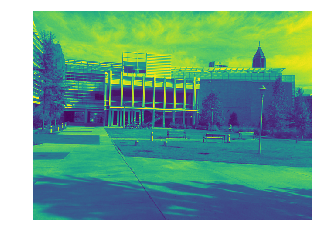

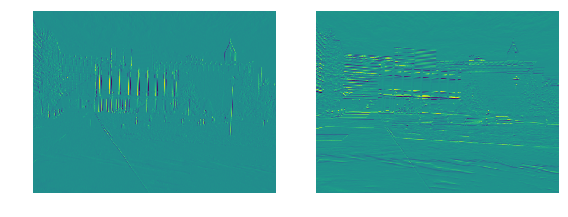

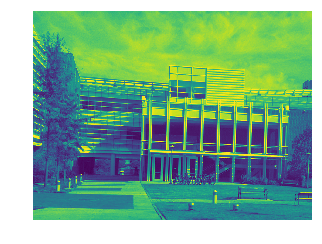

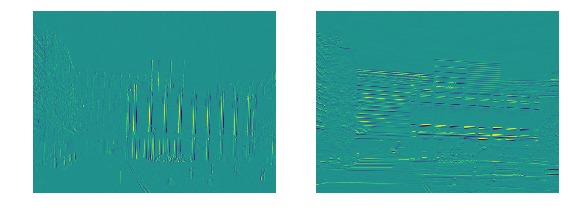

In [2]:
# X and Y image gradients

def ps4_1a():
    img1 = util.read_img_gray_mode('simA.jpg')
    img2 = util.read_img_gray_mode('transA.jpg')
    grad_x_img1, grad_y_img1 = util.grad_x(img1, 3, norm=True), util.grad_y(img1, 3, norm=True)
    grad_x_img2, grad_y_img2 = util.grad_x(img2, 3, norm=True), util.grad_y(img2, 3, norm=True)
    
    util.write_img('ps4-1-a-1.png', np.hstack((grad_x_img1, grad_y_img1)))
    util.write_img('ps4-1-a-2.png', np.hstack((grad_x_img2, grad_y_img2)))

    util.show_img(img1, size=(5, 5))
    util.show_images_together(grad_x_img1, grad_y_img1, size=(8,8))
    util.show_img(img2, size=(5, 5))
    util.show_images_together(grad_x_img2, grad_y_img2, size=(8,8))
    
ps4_1a()

In [3]:
imgs = ['transA.jpg', 'transB.jpg', 'simA.jpg', 'simB.jpg']

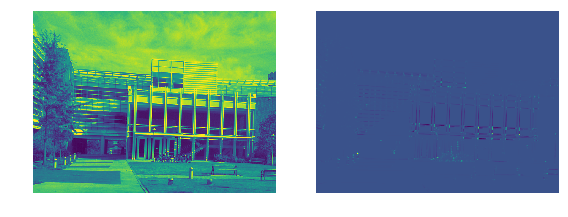

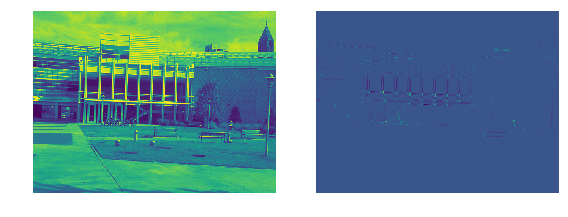

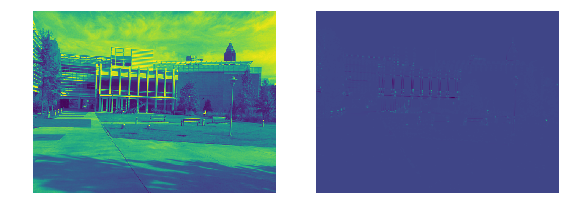

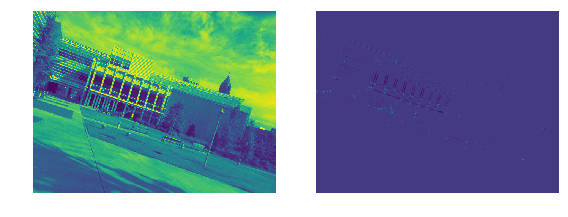

In [4]:
# Harris Values

def ps4_1b():
    for idx, img_name in enumerate(imgs):
        img = util.read_img_gray_mode(img_name)
        harris_value_img = harris_values(img, window_size=3, harris_scoring=0.04, norm=True)
        util.write_img('ps4-1-b-'+str(idx+1)+'.png', harris_value_img)
        util.show_images_together(img, harris_value_img, size=(8,8))
        
ps4_1b()

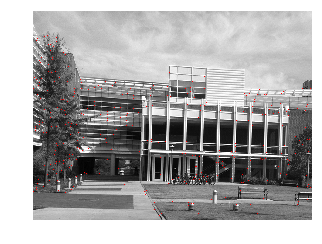

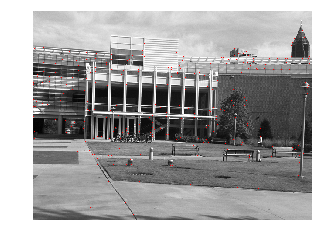

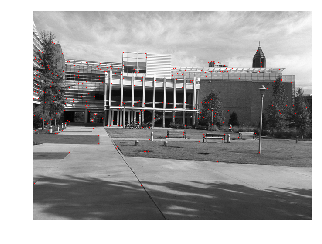

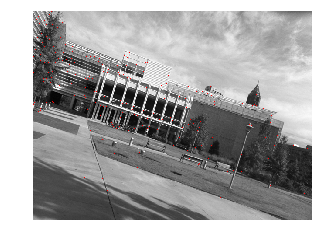

In [6]:
# harris corner
def ps4_1c():
    for idx, img_name in enumerate(imgs):
        img = util.read_img(img_name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
        corners = harris_corners(img, window_size=3, harris_scoring=0.04, threshold=1e-3, nms_size=5)
        img[corners > 0] = [0, 0, 255]
        util.write_img('ps4-1-c-'+str(idx+1)+'.png', img)
        util.show_img(img, size=(5, 5))
        
ps4_1c()

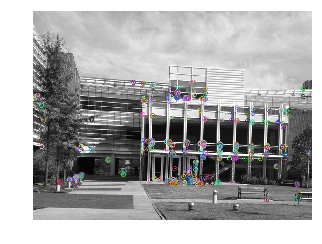

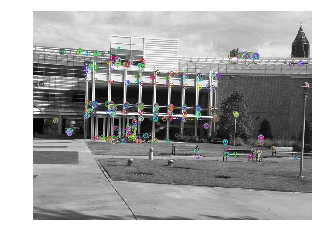

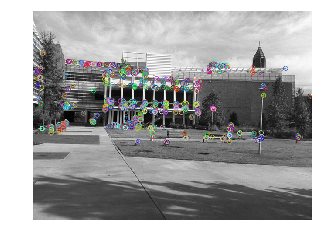

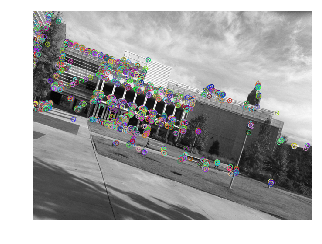

In [7]:
# SIFT
def ps4_2a():
    for idx, img_name in enumerate(imgs):
        img = util.read_img(img_name)
        img, keypoints = get_keypoints(img)
        util.write_img('ps4-2-a-'+str(idx+1)+'.png', img)
        util.show_img(img, size=(5, 5))
        
ps4_2a()

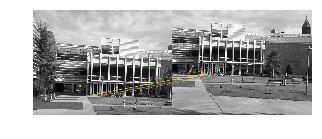

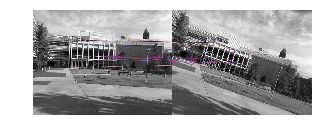

In [10]:
def ps4_2b():
    for idx in range(len(imgs)//2):
        img1 = util.read_img(imgs[2*idx])
        img2 = util.read_img(imgs[2*idx+1])
        matching = draw_keypoints(img1, img2)
        util.write_img('ps4-2-b-'+str(idx+1)+'.png', matching)
        util.show_img(matching, size=(5, 5))
        
ps4_2b()